# IMPORT LIBRARIES

In [2]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import cv2
import random
import os
from matplotlib.image import imread
import textwrap
from wordcloud import WordCloud
random.seed(42)

# READ AND DISPLAY - TRAIN, VALIDATION AND TEST DATASETS

In [3]:
# Define the file paths for your JSON files
train_json_file = "./train/train.json"
validation_json_file = "./validation/validation.json"
test_json_file = "./test/test.json"

# Read the train.json file into a pandas DataFrame
train_df = pd.read_json(train_json_file)

# Read the validation.json file into a pandas DataFrame
validation_df = pd.read_json(validation_json_file)

# Read the test.json file into a pandas DataFrame
test_df = pd.read_json(test_json_file)

# Format the DataFrames as a table with left-aligned columns
train_table = tabulate(train_df.head(), headers='keys', tablefmt='psql', numalign="left")
validation_table = tabulate(validation_df.head(), headers='keys', tablefmt='psql', numalign="left")
test_table = tabulate(test_df.head(), headers='keys', tablefmt='psql', numalign="left")

# Display the formatted tables
print("Train DataFrame:")
print(train_table, "\n")

print("Validation DataFrame:")
print(validation_table, "\n")

print("Test DataFrame:")
print(test_table, "\n")

Train DataFrame:
+----+----------------+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------+---------------------+
|    | SENTENCE_ID    | SENTENCE_NAME              | SENTENCE_DESCRIPTION                                                                                                                                                                                                                      | SENTENCE_FILE_PATH                             | SENTENCE_DURATION   |
|----+----------------+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# DIMENSIONS OF THE DATASETS

In [4]:
# Get the dimensions of the train dataset
train_rows, train_cols = train_df.shape
print("Train Dataset Dimensions:")
print("Number of Rows:", train_rows)
print("Number of Columns:", train_cols)

# Get the dimensions of the validation dataset
validation_rows, validation_cols = validation_df.shape
print("Validation Dataset Dimensions:")
print("Number of Rows:", validation_rows)
print("Number of Columns:", validation_cols)

# Get the dimensions of the test dataset
test_rows, test_cols = test_df.shape
print("Test Dataset Dimensions:")
print("Number of Rows:", test_rows)
print("Number of Columns:", test_cols)


Train Dataset Dimensions:
Number of Rows: 31047
Number of Columns: 5
Validation Dataset Dimensions:
Number of Rows: 1739
Number of Columns: 5
Test Dataset Dimensions:
Number of Rows: 2343
Number of Columns: 5


# SENTENCE DURATION SUMMARY

In [5]:
# Set pandas display options to show all columns and avoid truncating the output
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# Data Summary for the "SENTENCE_DURATION" column of the train, validation, and test datasets
print("Sentence Duration Summary:")
summary_df = pd.DataFrame({
    'Train Dataset': train_df['SENTENCE_DURATION'].describe(),
    'Validation Dataset': validation_df['SENTENCE_DURATION'].describe(),
    'Test Dataset': test_df['SENTENCE_DURATION'].describe()
})
print(summary_df)


Sentence Duration Summary:
       Train Dataset  Validation Dataset  Test Dataset
count   31047.000000         1739.000000   2343.000000
mean        6.444160            6.167591      6.283777
std         5.277732            4.896589      5.189353
min         0.040000            0.120000      0.040000
25%         2.880000            2.740000      2.710000
50%         5.080000            5.000000      4.960000
75%         8.420000            8.250000      8.250000
max       107.460000           71.000000     41.500000


# MISSING VALUES

In [6]:
# Check for missing values in the train dataset
train_missing_values = train_df.isnull().sum()
print("Train Dataset Missing Values:")
print(train_missing_values)

# Check for missing values in the validation dataset
validation_missing_values = validation_df.isnull().sum()
print("Validation Dataset Missing Values:")
print(validation_missing_values)

# Check for missing values in the test dataset
test_missing_values = test_df.isnull().sum()
print("Test Dataset Missing Values:")
print(test_missing_values)


Train Dataset Missing Values:
SENTENCE_ID             0
SENTENCE_NAME           0
SENTENCE_DESCRIPTION    0
SENTENCE_FILE_PATH      0
SENTENCE_DURATION       0
dtype: int64
Validation Dataset Missing Values:
SENTENCE_ID             0
SENTENCE_NAME           0
SENTENCE_DESCRIPTION    0
SENTENCE_FILE_PATH      0
SENTENCE_DURATION       0
dtype: int64
Test Dataset Missing Values:
SENTENCE_ID             0
SENTENCE_NAME           0
SENTENCE_DESCRIPTION    0
SENTENCE_FILE_PATH      0
SENTENCE_DURATION       0
dtype: int64


# COUNT OF UNIQUE SENTENCE DESCRIPTIONS 

In [7]:
# Check the unique values in the train dataset
train_unique_values = train_df['SENTENCE_DESCRIPTION'].nunique()
print("Train Dataset Unique Values:", train_unique_values)

# Check the unique values in the validation dataset
validation_unique_values = validation_df['SENTENCE_DESCRIPTION'].nunique()
print("Validation Dataset Unique Values:", validation_unique_values)

# Check the unique values in the test dataset
test_unique_values = test_df['SENTENCE_DESCRIPTION'].nunique()
print("Test Dataset Unique Values:", test_unique_values)


Train Dataset Unique Values: 30008
Validation Dataset Unique Values: 1514
Test Dataset Unique Values: 1925


In [8]:
train_df_duplicate_values = train_df[train_df["SENTENCE_DESCRIPTION"].duplicated(keep=False)]
for _, row in train_df_duplicate_values.iterrows():
    print(f"Sentence ID: {row['SENTENCE_ID']}\tSentence Description: {row['SENTENCE_DESCRIPTION']}")
validation_df_duplicate_values = validation_df[validation_df["SENTENCE_DESCRIPTION"].duplicated(keep=False)]
for _, row in validation_df_duplicate_values.iterrows():
    print(f"Sentence ID: {row['SENTENCE_ID']}\tSentence Description: {row['SENTENCE_DESCRIPTION']}")
test_df_duplicate_values = test_df[test_df["SENTENCE_DESCRIPTION"].duplicated(keep=False)]
for _, row in test_df_duplicate_values.iterrows():
    print(f"Sentence ID: {row['SENTENCE_ID']}\tSentence Description: {row['SENTENCE_DESCRIPTION']}")

Sentence ID: --8pSDeC-fg_0	Sentence Description: Hi.
Sentence ID: --dANj_01AU_19	Sentence Description: Back and forth.
Sentence ID: --dANj_01AU_20	Sentence Description: Back and forth.
Sentence ID: -0FA6OhxZSE_0	Sentence Description: DAVID CLEMEN: Hi.
Sentence ID: -0N0jbyBW6g_0	Sentence Description: Hello.
Sentence ID: -0N0jbyBW6g_11	Sentence Description: Thank you.
Sentence ID: -0daC3SWCPQ_0	Sentence Description: Hello!
Sentence ID: -0yRaqY7nTE_0	Sentence Description: Hi.
Sentence ID: -1PeVdIwiq0_1	Sentence Description: Today we're going to be talking about buying a new car.
Sentence ID: -23PZTqtDBw_0	Sentence Description: Off-season training for football.
Sentence ID: -23PZTqtDBw_2	Sentence Description: Okay?
Sentence ID: -23PZTqtDBw_8	Sentence Description: Alright?
Sentence ID: -6PZkp-zC78_0	Sentence Description: Hi, I'm Stan DeFreitas, Mr. Green Thumb for On Gardening.
Sentence ID: -70D86eMmIc_0	Sentence Description: YOLANDA VANVEEN: Hi.
Sentence ID: -8L6L9fFWK8_0	Sentence Descript

# NUMBER OF DUPLICATE ENTRIES

In [9]:
# Check the number of duplicate rows in the train dataset
train_duplicates = train_df.duplicated().sum()
print("Train Dataset Duplicate Rows:", train_duplicates)

# Check the number of duplicate rows in the validation dataset
validation_duplicates = validation_df.duplicated().sum()
print("Validation Dataset Duplicate Rows:", validation_duplicates)

# Check the number of duplicate rows in the test dataset
test_duplicates = test_df.duplicated().sum()
print("Test Dataset Duplicate Rows:", test_duplicates)

Train Dataset Duplicate Rows: 0
Validation Dataset Duplicate Rows: 0
Test Dataset Duplicate Rows: 0


# FRAME SIZE DETAILS

In [10]:
# Function to get frame size of a video
def get_frame_size(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

# Get frame size details for Train Dataset
train_frame_sizes = train_df['SENTENCE_FILE_PATH'].apply(get_frame_size)
train_frame_widths, train_frame_heights = zip(*train_frame_sizes)

# Get frame size details for Validation Dataset
validation_frame_sizes = validation_df['SENTENCE_FILE_PATH'].apply(get_frame_size)
validation_frame_widths, validation_frame_heights = zip(*validation_frame_sizes)

# Get frame size details for Test Dataset
test_frame_sizes = test_df['SENTENCE_FILE_PATH'].apply(get_frame_size)
test_frame_widths, test_frame_heights = zip(*test_frame_sizes)

# Display frame size details for Train Dataset
print("Train Dataset Frame Size Details:")
print("-------------------------------")
print(f"Minimum Width: {min(train_frame_widths)}")
print(f"Maximum Width: {max(train_frame_widths)}")
print(f"Average Width: {sum(train_frame_widths) / len(train_frame_widths)}")
print(f"Minimum Height: {min(train_frame_heights)}")
print(f"Maximum Height: {max(train_frame_heights)}")
print(f"Average Height: {sum(train_frame_heights) / len(train_frame_heights)}")

# Display frame size details for Validation Dataset
print("\nValidation Dataset Frame Size Details:")
print("------------------------------------")
print(f"Minimum Width: {min(validation_frame_widths)}")
print(f"Maximum Width: {max(validation_frame_widths)}")
print(f"Average Width: {sum(validation_frame_widths) / len(validation_frame_widths)}")
print(f"Minimum Height: {min(validation_frame_heights)}")
print(f"Maximum Height: {max(validation_frame_heights)}")
print(f"Average Height: {sum(validation_frame_heights) / len(validation_frame_heights)}")

# Display frame size details for Test Dataset
print("\nTest Dataset Frame Size Details:")
print("--------------------------------")
print(f"Minimum Width: {min(test_frame_widths)}")
print(f"Maximum Width: {max(test_frame_widths)}")
print(f"Average Width: {sum(test_frame_widths) / len(test_frame_widths)}")
print(f"Minimum Height: {min(test_frame_heights)}")
print(f"Maximum Height: {max(test_frame_heights)}")
print(f"Average Height: {sum(test_frame_heights) / len(test_frame_heights)}")


Train Dataset Frame Size Details:
-------------------------------
Minimum Width: 1280
Maximum Width: 1920
Average Width: 1281.216220568815
Minimum Height: 720
Maximum Height: 1080
Average Height: 720.6841240699584

Validation Dataset Frame Size Details:
------------------------------------
Minimum Width: 1280
Maximum Width: 1280
Average Width: 1280.0
Minimum Height: 720
Maximum Height: 720
Average Height: 720.0

Test Dataset Frame Size Details:
--------------------------------
Minimum Width: 1280
Maximum Width: 1280
Average Width: 1280.0
Minimum Height: 720
Maximum Height: 720
Average Height: 720.0


# DISPLAY RANDOM SAMPLE VIDEOS

In [11]:
# Define a function to play random video samples
def play_random_sample_video(video_files_path, dataset_name):
    video_files = os.listdir(video_files_path)
    random_video_file = random.choice(video_files)
    video_file_path = os.path.join(video_files_path, random_video_file)

    cap = cv2.VideoCapture(video_file_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow(f"Sample Video from {dataset_name} Dataset", frame)

        # Wait for 25ms and check if 'q' key is pressed to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Specify the path to the folder containing the videos in the train, validation, and test datasets
train_videos_folder = './train/videos/'
validation_videos_folder = './validation/videos/'
test_videos_folder = './test/videos/'

# Play a random sample video from the train dataset
play_random_sample_video(train_videos_folder, "Train")

# Play a random sample video from the validation dataset
play_random_sample_video(validation_videos_folder, "Validation")

# Play a random sample video from the test dataset
play_random_sample_video(test_videos_folder, "Test")


# DISPLAY SAMPLE FRAMES FROM RANDOM VIDEOS

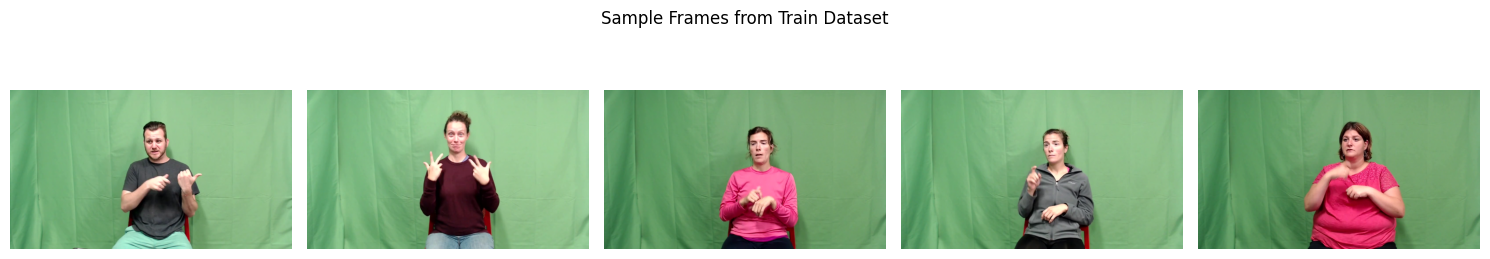

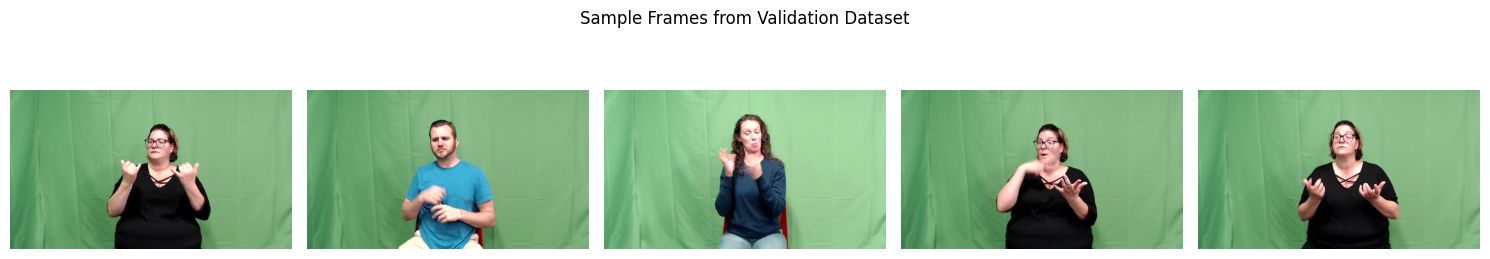

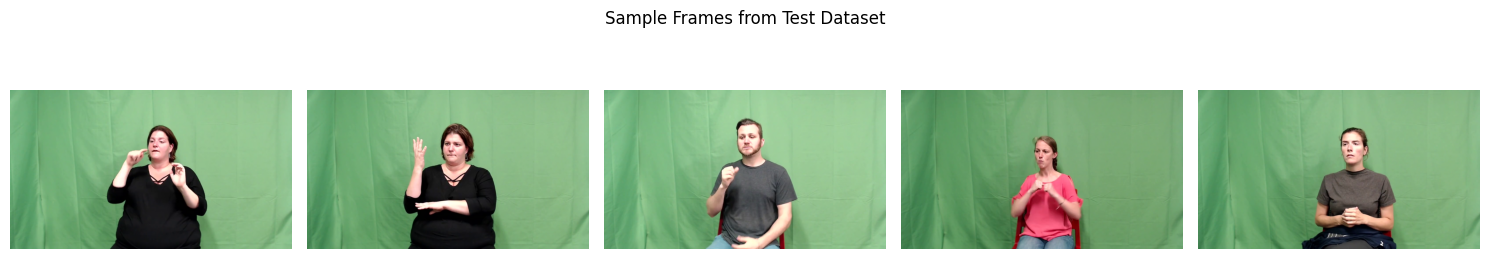

In [12]:
# Define a function to display random frame samples
def display_sample_frames(video_files_path, dataset_name, num_frames=5):
    video_files = os.listdir(video_files_path)
    random_video_files = random.sample(video_files, num_frames)

    fig, axes = plt.subplots(1, num_frames, figsize=(15, 3))

    for i, video_file in enumerate(random_video_files):
        video_file_path = os.path.join(video_files_path, video_file)
        cap = cv2.VideoCapture(video_file_path)

        frame_count = 0
        while cap.isOpened() and frame_count < num_frames:
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axes[i].imshow(frame)
            axes[i].axis('off')

            frame_count += 1

        cap.release()

    fig.suptitle(f"Sample Frames from {dataset_name} Dataset")
    plt.tight_layout()
    plt.show()

# Specify the number of sample frames to display from each dataset
num_sample_frames = 5

# Display sample frames as a list of images from random videos in the train dataset
display_sample_frames(train_videos_folder, "Train", num_frames=num_sample_frames)

# Display sample frames as a list of images from random videos in the validation dataset
display_sample_frames(validation_videos_folder, "Validation", num_frames=num_sample_frames)

# Display sample frames as a list of images from random videos in the test dataset
display_sample_frames(test_videos_folder, "Test", num_frames=num_sample_frames)


# NUMBER OF FRAMES

In [13]:
# Define a function to frame count from each video file
def get_video_frame_count(video_files_path):
    video_files = os.listdir(video_files_path)
    frame_counts = {}

    for video_file in video_files:
        video_file_path = os.path.join(video_files_path, video_file)
        cap = cv2.VideoCapture(video_file_path)

        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_counts[video_file] = frame_count

        cap.release()

    return frame_counts


# Get the frame count information for videos in the train dataset
train_frame_counts = get_video_frame_count(train_videos_folder)

# Get the frame count information for videos in the validation dataset
validation_frame_counts = get_video_frame_count(validation_videos_folder)

# Get the frame count information for videos in the test dataset
test_frame_counts = get_video_frame_count(test_videos_folder)

# Print the frame count information for the train dataset
print("Train Dataset Frame Count Information:")
for video_file, frame_count in train_frame_counts.items():
    print(f"Video: {video_file}\tFrame Count: {frame_count}")

# Print the frame count information for the validation dataset
print("\nValidation Dataset Frame Count Information:")
for video_file, frame_count in validation_frame_counts.items():
    print(f"Video: {video_file}\tFrame Count: {frame_count}")

# Print the frame count information for the test dataset
print("\nTest Dataset Frame Count Information:")
for video_file, frame_count in test_frame_counts.items():
    print(f"Video: {video_file}\tFrame Count: {frame_count}")


Train Dataset Frame Count Information:
Video: --7E2sU6zP4_10-5-rgb_front.mp4	Frame Count: 365
Video: --7E2sU6zP4_11-5-rgb_front.mp4	Frame Count: 565
Video: --7E2sU6zP4_12-5-rgb_front.mp4	Frame Count: 349
Video: --7E2sU6zP4_13-5-rgb_front.mp4	Frame Count: 144
Video: --7E2sU6zP4_5-5-rgb_front.mp4	Frame Count: 212
Video: --7E2sU6zP4_6-5-rgb_front.mp4	Frame Count: 402
Video: --7E2sU6zP4_7-5-rgb_front.mp4	Frame Count: 289
Video: --7E2sU6zP4_8-5-rgb_front.mp4	Frame Count: 364
Video: --7E2sU6zP4_9-5-rgb_front.mp4	Frame Count: 239
Video: --8pSDeC-fg_0-5-rgb_front.mp4	Frame Count: 15
Video: --8pSDeC-fg_1-5-rgb_front.mp4	Frame Count: 51
Video: --8pSDeC-fg_10-5-rgb_front.mp4	Frame Count: 160
Video: --8pSDeC-fg_11-5-rgb_front.mp4	Frame Count: 60
Video: --8pSDeC-fg_12-5-rgb_front.mp4	Frame Count: 250
Video: --8pSDeC-fg_13-5-rgb_front.mp4	Frame Count: 131
Video: --8pSDeC-fg_14-5-rgb_front.mp4	Frame Count: 466
Video: --8pSDeC-fg_15-5-rgb_front.mp4	Frame Count: 148
Video: --8pSDeC-fg_16-5-rgb_front.mp

# FRAME PER SECOND (FPS) 

In [14]:
def get_video_fps(video_files_path):
    video_files = os.listdir(video_files_path)
    fps_info = {}

    for video_file in video_files:
        video_file_path = os.path.join(video_files_path, video_file)
        cap = cv2.VideoCapture(video_file_path)

        fps = cap.get(cv2.CAP_PROP_FPS)
        fps_info[video_file] = fps

        cap.release()

    return fps_info


# Get the fps information for videos in the train dataset
train_fps_info = get_video_fps(train_videos_folder)

# Get the fps information for videos in the validation dataset
validation_fps_info = get_video_fps(validation_videos_folder)

# Get the fps information for videos in the test dataset
test_fps_info = get_video_fps(test_videos_folder)

# Print the fps information for the train dataset
print("Train Dataset FPS Information:")
for video_file, fps in train_fps_info.items():
    print(f"Video: {video_file}\tFPS: {fps}")

# Print the fps information for the validation dataset
print("\nValidation Dataset FPS Information:")
for video_file, fps in validation_fps_info.items():
    print(f"Video: {video_file}\tFPS: {fps}")

# Print the fps information for the test dataset
print("\nTest Dataset FPS Information:")
for video_file, fps in test_fps_info.items():
    print(f"Video: {video_file}\tFPS: {fps}")


Train Dataset FPS Information:
Video: --7E2sU6zP4_10-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_11-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_12-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_13-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_5-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_6-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_7-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_8-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --7E2sU6zP4_9-5-rgb_front.mp4	FPS: 23.976023976023978
Video: --8pSDeC-fg_0-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_1-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_10-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_11-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_12-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_13-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_14-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_15-5-rgb_front.mp4	FPS: 24.0
Video: --8pSDeC-fg_16-5-rgb_front.

# PLAY RANDOM SAMPLE VIDEOS WITH ANNOTATIONS

In [15]:
# Define a function to play videos with annotations
def display_video_with_annotation(video_path, sentence, dataset_name):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        if not ret:
            break

        # Calculate the size of the annotation text
        annotation_text = f'SENTENCE: {sentence}'
        annotation_font = cv2.FONT_HERSHEY_SIMPLEX
        annotation_scale = 0.8
        annotation_thickness = 2

        # Split the sentence into words
        words = annotation_text.split()
        # Assemble lines with a maximum of 15 words each
        wrapped_text = [' '.join(words[i:i+15]) for i in range(0, len(words), 15)]

        # Draw the annotation text on the frame
        for i, line in enumerate(wrapped_text):
            (line_text_width, line_text_height), _ = cv2.getTextSize(line, annotation_font, annotation_scale, annotation_thickness)
            line_x = int((frame.shape[1] - line_text_width) / 2)
            
            # Start from bottom y-position and subtract as we progress through lines
            line_y = int(frame.shape[0] * 0.9) - int(line_text_height * 1.5 * (len(wrapped_text) - 1 - i)) 
            
            cv2.putText(frame, line, (line_x, line_y), annotation_font, annotation_scale, (255, 255, 255), annotation_thickness, cv2.LINE_AA)

        # Display the frame with the window title as 'Sample video from (the dataset name)'
        cv2.imshow(f'Sample video from {dataset_name}', frame)

        # Check for user input to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Release the video capture and close the OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


# Select a random video from the train dataset
random_train_video_index = random.randint(0, len(train_df)-1)
random_train_video = train_df['SENTENCE_FILE_PATH'].iloc[random_train_video_index]
random_train_sentence = train_df['SENTENCE_DESCRIPTION'].iloc[random_train_video_index]

# Display the video with the annotation and the window title as 'Sample video from Train dataset'
display_video_with_annotation(random_train_video, random_train_sentence, 'Train dataset')

# Select a random video from the validation dataset
random_validation_video_index = random.randint(0, len(validation_df)-1)
random_validation_video = validation_df['SENTENCE_FILE_PATH'].iloc[random_validation_video_index]
random_validation_sentence = validation_df['SENTENCE_DESCRIPTION'].iloc[random_validation_video_index]

# Display the video with the annotation and the window title as 'Sample video from Validation dataset'
display_video_with_annotation(random_validation_video, random_validation_sentence, 'Validation dataset')

# Select a random video from the test dataset
random_test_video_index = random.randint(0, len(test_df)-1)
random_test_video = test_df['SENTENCE_FILE_PATH'].iloc[random_test_video_index]
random_test_sentence = test_df['SENTENCE_DESCRIPTION'].iloc[random_test_video_index]

# Display the video with the annotation and the window title as 'Sample video from Test dataset'
display_video_with_annotation(random_test_video, random_test_sentence, 'Test dataset')


# DISTRIBUTION OF SENTENCE LENGTHS

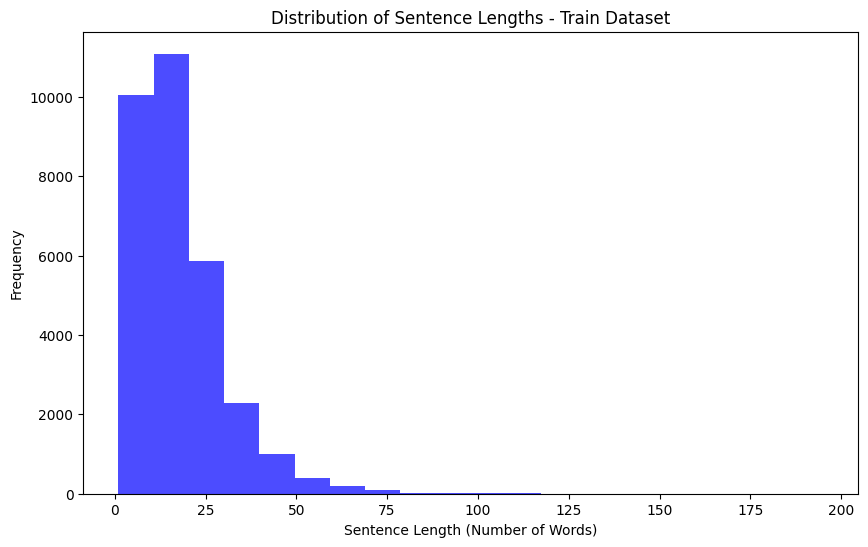

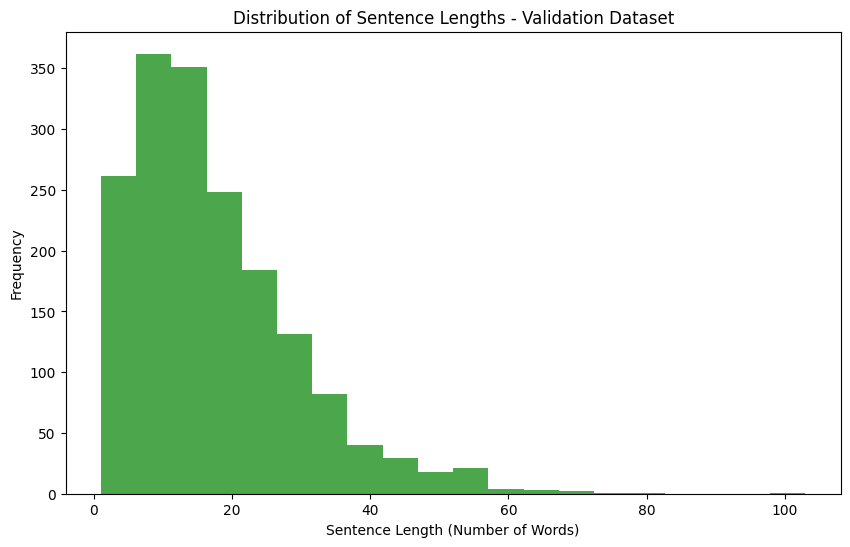

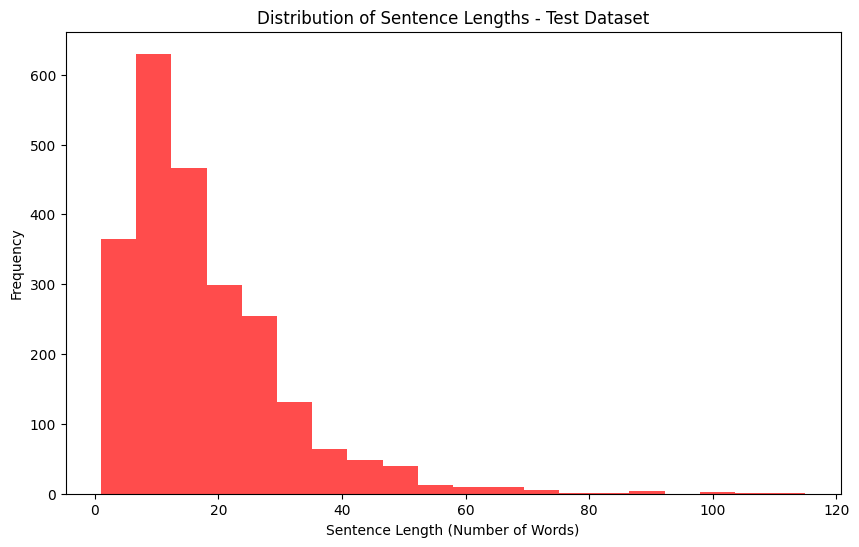

In [16]:
# Calculate the length of each sentence in terms of the number of words
train_sentence_lengths = train_df['SENTENCE_DESCRIPTION'].apply(lambda x: len(x.split()))
validation_sentence_lengths = validation_df['SENTENCE_DESCRIPTION'].apply(lambda x: len(x.split()))
test_sentence_lengths = test_df['SENTENCE_DESCRIPTION'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths in the train dataset
plt.figure(figsize=(10, 6))
plt.hist(train_sentence_lengths, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths - Train Dataset')
plt.show()

# Plot the distribution of sentence lengths in the validation dataset
plt.figure(figsize=(10, 6))
plt.hist(validation_sentence_lengths, bins=20, color='green', alpha=0.7)
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths - Validation Dataset')
plt.show()

# Plot the distribution of sentence lengths in the test dataset
plt.figure(figsize=(10, 6))
plt.hist(test_sentence_lengths, bins=20, color='red', alpha=0.7)
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths - Test Dataset')
plt.show()


# WORD CLOUD TO FIND MOST COMMON VIDEOS

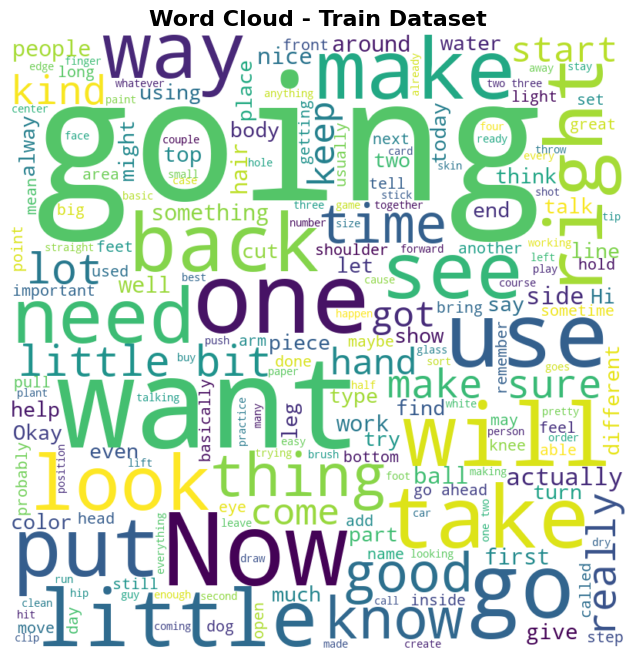

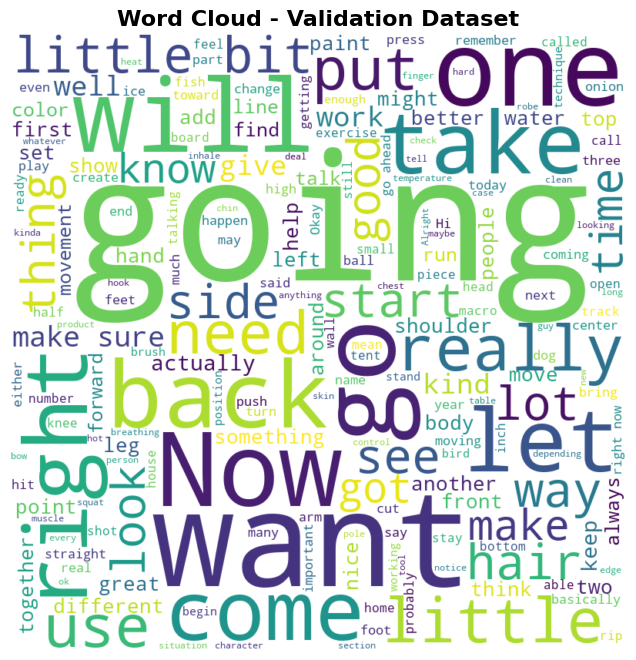

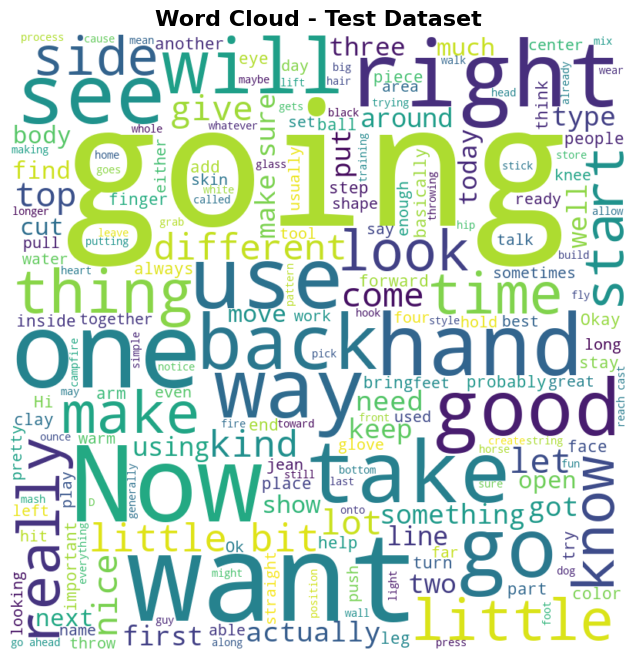

In [17]:

# Generate word cloud for the train dataset
train_text = ' '.join(train_df['SENTENCE_DESCRIPTION'].tolist())
wordcloud_train = WordCloud(width=800, height=800, background_color='white').generate(train_text)

# Generate word cloud for the validation dataset
validation_text = ' '.join(validation_df['SENTENCE_DESCRIPTION'].tolist())
wordcloud_validation = WordCloud(width=800, height=800, background_color='white').generate(validation_text)

# Generate word cloud for the test dataset
test_text = ' '.join(test_df['SENTENCE_DESCRIPTION'].tolist())
wordcloud_test = WordCloud(width=800, height=800, background_color='white').generate(test_text)

# Display the word cloud for train dataset
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Word Cloud - Train Dataset', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# Display the word cloud for validation dataset
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_validation, interpolation='bilinear')
plt.title('Word Cloud - Validation Dataset', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

# Display the word cloud for test dataset
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.title('Word Cloud - Test Dataset', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()


# PERCENTAGE OF UNIQUE WORDS

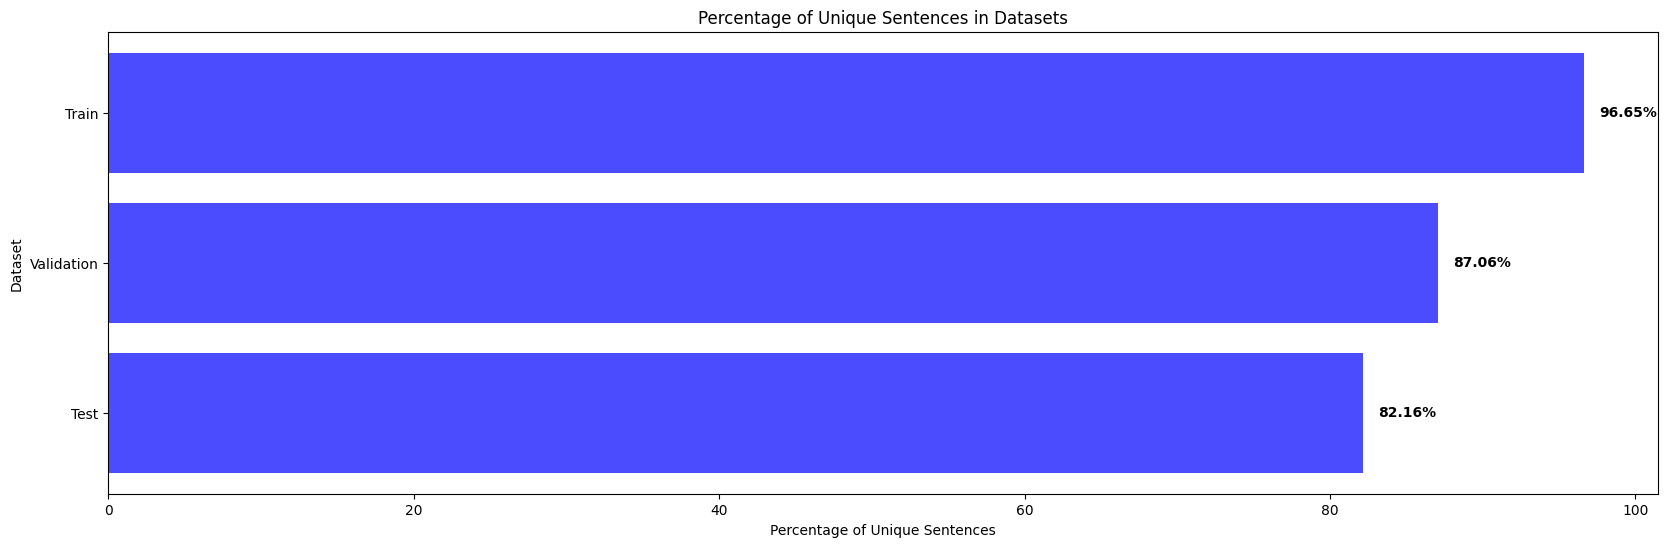

In [18]:
# Calculate the percentage of unique sentences in the train dataset
train_percentage_unique = (train_unique_values / train_rows) * 100

# Calculate the percentage of unique sentences in the validation dataset
validation_percentage_unique = (validation_unique_values / validation_rows) * 100

# Calculate the percentage of unique sentences in the test dataset
test_percentage_unique = (test_unique_values / test_rows) * 100

# Create a horizontal bar plot of the percentage of unique sentences
datasets = ['Test', 'Validation', 'Train']
percentages = [test_percentage_unique, validation_percentage_unique, train_percentage_unique]

plt.figure(figsize=(20, 6))
plt.barh(datasets, percentages, color='blue', alpha=0.7)

# Display percentage values on the bars
for i, v in enumerate(percentages):
    plt.text(v + 1, i, f'{v:.2f}%', va='center', fontweight='bold')

plt.xlabel('Percentage of Unique Sentences')
plt.ylabel('Dataset')
plt.title('Percentage of Unique Sentences in Datasets')

plt.show()

# HISTOGRAM OF SENTENCE DURATIONS

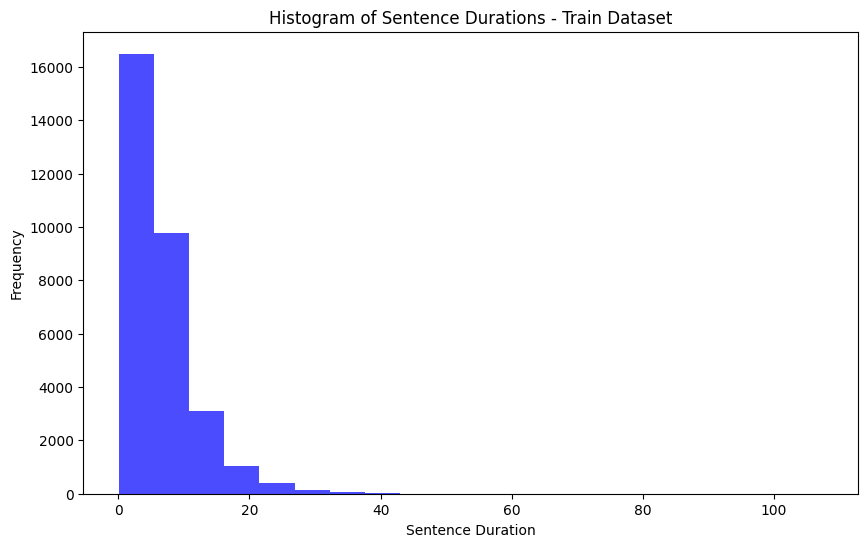

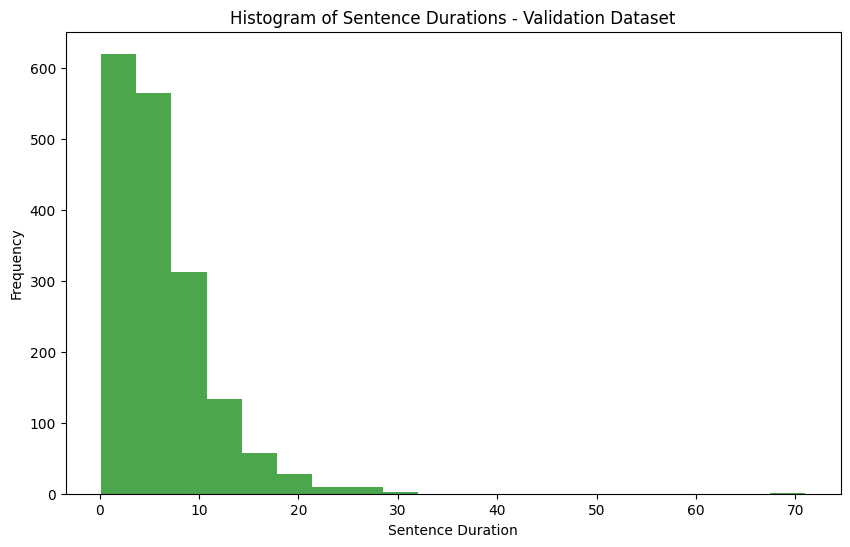

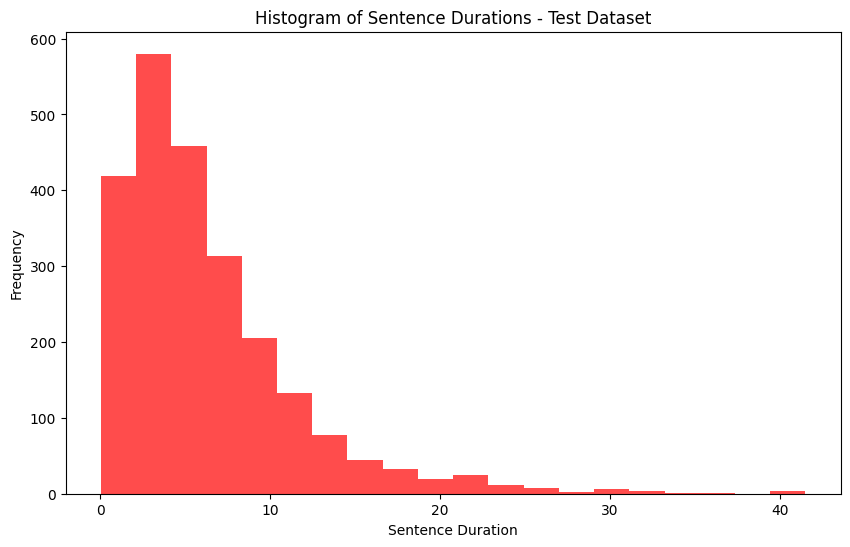

In [19]:
# Plot a histogram of sentence durations in the train dataset
plt.figure(figsize=(10, 6))
plt.hist(train_df['SENTENCE_DURATION'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentence Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Durations - Train Dataset')
plt.show()

# Plot a histogram of sentence durations in the validation dataset
plt.figure(figsize=(10, 6))
plt.hist(validation_df['SENTENCE_DURATION'], bins=20, color='green', alpha=0.7)
plt.xlabel('Sentence Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Durations - Validation Dataset')
plt.show()

# Plot a histogram of sentence durations in the test dataset
plt.figure(figsize=(10, 6))
plt.hist(test_df['SENTENCE_DURATION'], bins=20, color='red', alpha=0.7)
plt.xlabel('Sentence Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Durations - Test Dataset')
plt.show()
